In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from sqlalchemy import create_engine
from login_credentials import username
from login_credentials import password

# Store Excel file into DataFrame

In [2]:
#Read excel file 
xlsx_file = "./Data/excel_diabetes.xlsx"
print(xlsx_file)

./Data/excel_diabetes.xlsx


In [3]:
# engine = 'openpyxl' allows conversion of excel into csv file
excel_data_df = pd.read_excel(xlsx_file, engine = 'openpyxl')
excel_data_df.to_csv ("excel_diabetes.csv", index = None,  header=True) 
excel_data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Rename id column to "id"
excel_data_df.index.name = "id"
excel_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
id,,,,,,,,,
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


# Store CSV file into DataFrame

In [5]:
# read csv file
csv_file = "./Data/csv_diabetes.csv"

In [6]:
# Create dataframe
csv_data_df = pd.read_csv(csv_file, encoding='iso-8859-1')
csv_data_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
#Rename id column to "id"
csv_data_df.index.name = "id"
csv_data_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [8]:
#Do a .loc to get rid of the data that we don't need.
#In this case we are looking at the data points: Diabetes_012, HighBP, HighChol, CholCheck, BMI and smoker
# clean_csv_data_df = csv_data_df.loc[:,["Diabetes_012", "HighBP", "Highchol", "CholCheck", "BMI", "Smoker"]]
# clean_csv_data_df


#Code to view all columns in dataset
pd.set_option('max_columns', None)
csv_data_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
id,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Clean DataFrame

In [9]:
#Drop data point that we don't need
csv_data_df_final = csv_data_df.drop(['Fruits', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'], axis=1)
csv_data_df_final.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke
id,,,,,,,
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0


In [10]:
#Combine the data into a single dataset
diabetes_data_df = pd.merge(excel_data_df, csv_data_df_final, how="outer", on=["id"])
diabetes_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,Diabetes_012,HighBP,HighChol,CholCheck,BMI_y,Smoker,Stroke
id,,,,,,,,,,,,,,,,
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,45.0,0.0,0.0
253676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,18.0,0.0,0.0
253677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,28.0,0.0,0.0


In [11]:
diabetes_data_df.count()

Pregnancies                    768
Glucose                        768
BloodPressure                  768
SkinThickness                  768
Insulin                        768
BMI_x                          768
DiabetesPedigreeFunction       768
Age                            768
Outcome                        768
Diabetes_012                253680
HighBP                      253680
HighChol                    253680
CholCheck                   253680
BMI_y                       253680
Smoker                      253680
Stroke                      253680
dtype: int64

In [12]:
#Drop the null columns
diabetes_data_df.dropna(subset = ["Pregnancies"], inplace=True)
diabetes_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,Diabetes_012,HighBP,HighChol,CholCheck,BMI_y,Smoker,Stroke
id,,,,,,,,,,,,,,,,
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0,0.0,0.0,1.0,30.0,1.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,2.0,1.0,1.0,1.0,28.0,0.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0,1.0,0.0,1.0,31.0,0.0,0.0


In [13]:
# Check the names of all the columns and see if there are any rows with missing data
diabetes_data_df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI_x                       768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
Diabetes_012                768
HighBP                      768
HighChol                    768
CholCheck                   768
BMI_y                       768
Smoker                      768
Stroke                      768
dtype: int64

In [14]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=diabetes_data_df.corr()
corr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,Diabetes_012,HighBP,HighChol,CholCheck,BMI_y,Smoker,Stroke
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.058222,-0.070873,-0.083730,0.057319,0.008524,0.081860,-0.002469
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.003938,-0.021905,-0.022383,-0.015681,-0.004839,0.003664,0.004574
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,-0.041855,-0.047965,0.004339,0.013826,-0.017642,0.092841,0.052211
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.015181,-0.010033,0.038647,-0.009457,0.024149,-0.055755,0.015664
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.003738,0.074771,0.014641,-0.009449,0.030421,-0.047246,-0.024550
BMI_x,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.025253,-0.063895,-0.012344,-0.063994,0.005358,0.003135,-0.015189
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.021049,0.038643,0.005737,-0.000022,0.047563,0.007822,0.001272
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.033847,-0.023625,-0.019931,-0.001348,0.018369,0.093156,0.067596
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,-0.005160,-0.028812,-0.036541,-0.002340,-0.025461,0.047765,-0.009015
Diabetes_012,0.058222,0.003938,-0.041855,-0.015181,-0.003738,-0.025253,-0.021049,0.033847,-0.005160,1.000000,0.249772,0.144701,0.079384,0.204151,-0.005009,0.163588


# Create graphs to show correlation between different variables in the Data Set

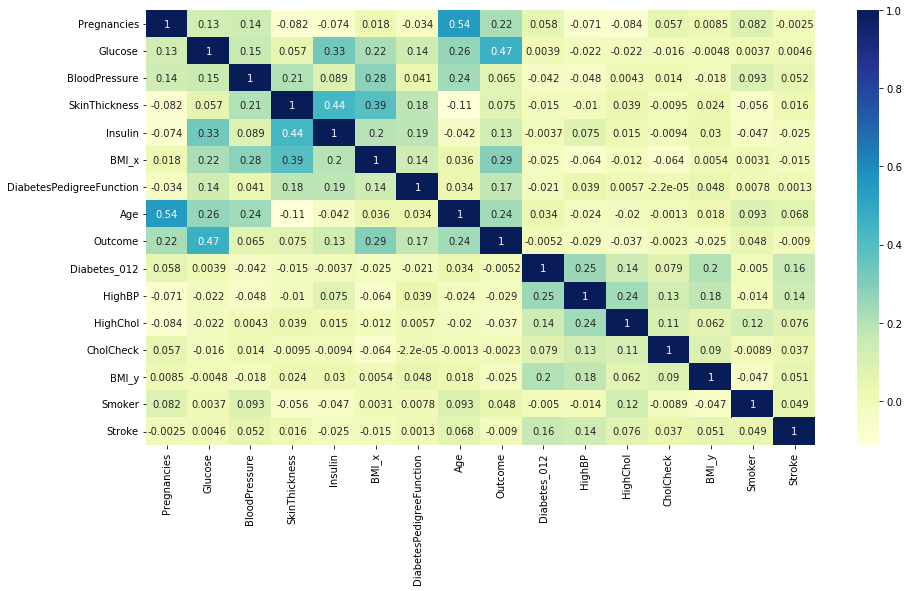

In [15]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(15, 8)
plt.show()

In [16]:
#Run the code below to get a statistical detail of the data set
diabetes_data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,Diabetes_012,HighBP,HighChol,CholCheck,BMI_y,Smoker,Stroke
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.494792,0.597656,0.528646,0.981771,29.084635,0.467448,0.070312
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.849863,0.490690,0.499504,0.133866,6.085602,0.499264,0.255840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000,1.000000,1.000000,1.000000,59.000000,1.000000,1.000000


([], <a list of 0 Text xticklabel objects>)

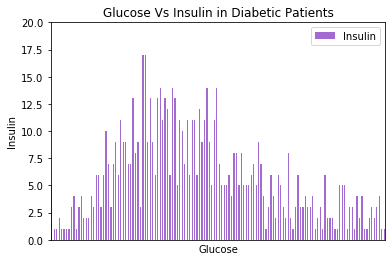

In [17]:
# Create a Bar Graph to see the relationship between Glucose and Insulin

r_bar=diabetes_data_df.groupby("Glucose")
# Create a dataframe count
r_count = pd.DataFrame(r_bar["Insulin"].count())
# Create a bar chart based off of the group series from before and label the title
# used hexidecimal code for fun and you can pick way more specfic colors
r_chart = r_count.plot(kind="bar", title="Glucose Vs Insulin in Diabetic Patients", color="#A36ACF",)
# Set the X-label and Y-label
r_chart.set_xlabel("Glucose")
r_chart.set_ylim([0, 20])
r_chart.set_ylabel("Insulin")
plt.xticks([])

In [18]:
# Regression Analysis
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel(f"{x_label}")    
    plt.ylabel(f"{y_label}")
    plt.grid(False)

The r-square is 0.23952794642136355
y = 0.39x + 56.0


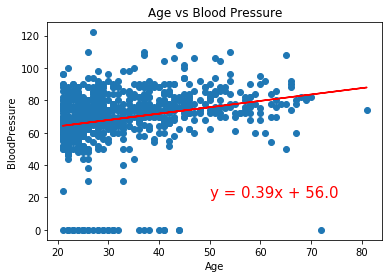

In [19]:
#set the data sets to compare
x_values = diabetes_data_df["Age"]
y_values = diabetes_data_df["BloodPressure"]
#move the equations to where it can be seen
regEQplotX = 50
regEQplotY = 20
#label the axis
x_label = "Age"
y_label = "BloodPressure"

#title
plt.title(f"Age vs Blood Pressure")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

The r-square is 0.33135710992020906
y = 1.19x + -64.59


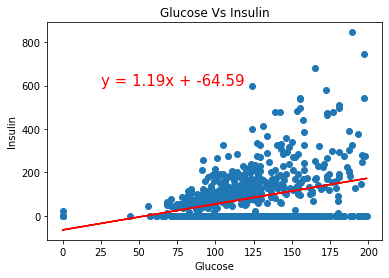

In [20]:
#set the data sets to compare
x_values = diabetes_data_df["Glucose"]
y_values = diabetes_data_df["Insulin"]
#move the equations to where it can be seen
regEQplotX = 25
regEQplotY = 600
#label the axis
x_label = "Glucose"
y_label = "Insulin"

#title
plt.title(f"Glucose Vs Insulin")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

The r-square is 0.14255795067819385
y = 0.27x + 0.58


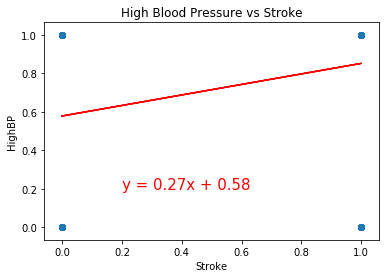

In [21]:
#set the data sets to compare
x_values = diabetes_data_df["Stroke"]
y_values = diabetes_data_df["HighBP"]
#move the equations to where it can be seen
regEQplotX = 0.2
regEQplotY = 0.2
#label the axis
x_label = "Stroke"
y_label = "HighBP"

#title
plt.title(f"High Blood Pressure vs Stroke")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# Connect to local database

In [22]:
#This error is showing because the version we are running now is up to date, but futur update will require this pip install to proceed
#pip install psycopg2-binary
protocol = 'postgresql'
# Making sure that our login_credential.py works
# username = 'username'
# password = 'password'

host = 'localhost'
port = 5432
database_name = 'diabetes_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

/Users/mariamadiallo/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Check for tables

In [23]:
engine.table_names()

/Users/mariamadiallo/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['diabetes']

# Use pandas to load csv converted DataFrame into database

In [24]:
diabetes_data_df.to_sql(name='diabetes', con=engine, if_exists='append', index=False, method='multi')

# Confirm data has been added by querying the diabetes table

In [25]:
df=pd.read_sql_query('select * from diabetes', con=engine).head()
df

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,Diabetes_012,HighBP,HighChol,CholCheck,BMI_y,Smoker,Stroke
0,1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0
1,2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0
2,3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0
4,5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0
